# Usage example: State-based connectivity

Currently, Comet includes five state-based dFC methods as published in:

> Mohammad Torabi, Georgios D Mitsis, Jean-Baptiste Poline, On the variability of dynamic functional connectivity<br>assessment methods, GigaScience, Volume 13, 2024, giae009, https://doi.org/10.1093/gigascience/giae009.

- Sliding Window Clustering
- Coactivation Patterns
- Continuous Hidden Markov Model
- Discrete Hidden Markov Model
- Windowless (K-SVD) Model

State-based connectivity analysis requires data from multiple subjects, so we start by getting some pre-processed time series data from the ABIDE dataset which we put in a list (a single 3D numpy array would also be fine):

In [1]:
import numpy as np
from nilearn import datasets
from matplotlib import pyplot as plt
from comet import utils, connectivity

subjects = ["50008", "50010", "50012", "50014", "50020"]
data = datasets.fetch_abide_pcp(SUB_ID=subjects, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160", legacy_format=False)
ts = data.rois_dosenbach160 # list of 2D time series data

print("Num subjects:",len(ts))
print("TS shape:", ts[0].shape)

[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp

Num subjects: 5
TS shape: (196, 161)


We can then calculate state-based functional connectivity with any of the methods, e.g.:

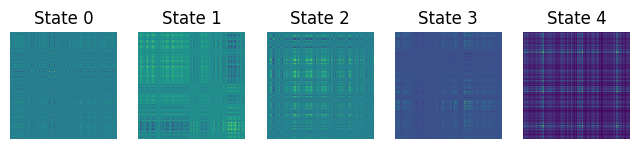

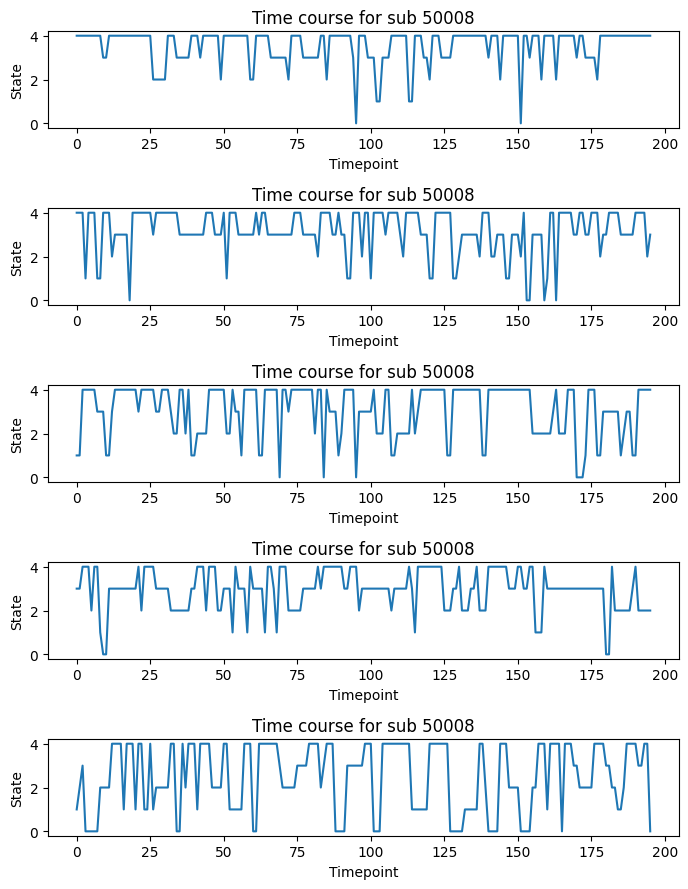

In [2]:
state_tc, states = connectivity.KSVD(ts, n_states=5).estimate()

# Plot all estimated states
fig, ax = plt.subplots(1, 5, figsize=(8,2))
for i in range(states.shape[2]):
    ax[i].imshow(states[:,:,i])
    ax[i].set_title(f"State {i}")
    ax[i].axis("off")

fig, ax = plt.subplots(5, 1, figsize=(7,9))
for i in range(states.shape[2]):
    ax[i].plot(state_tc[i,:])
    ax[i].set(title=f"Time course for sub {subjects[0]}", xlabel="Timepoint", ylabel="State")

plt.tight_layout();

100%|██████████| 5/5 [00:46<00:00,  9.35s/it]


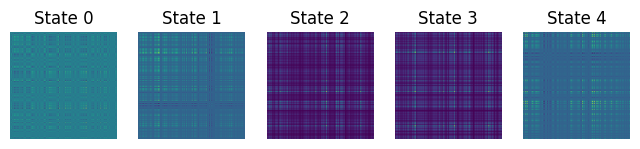

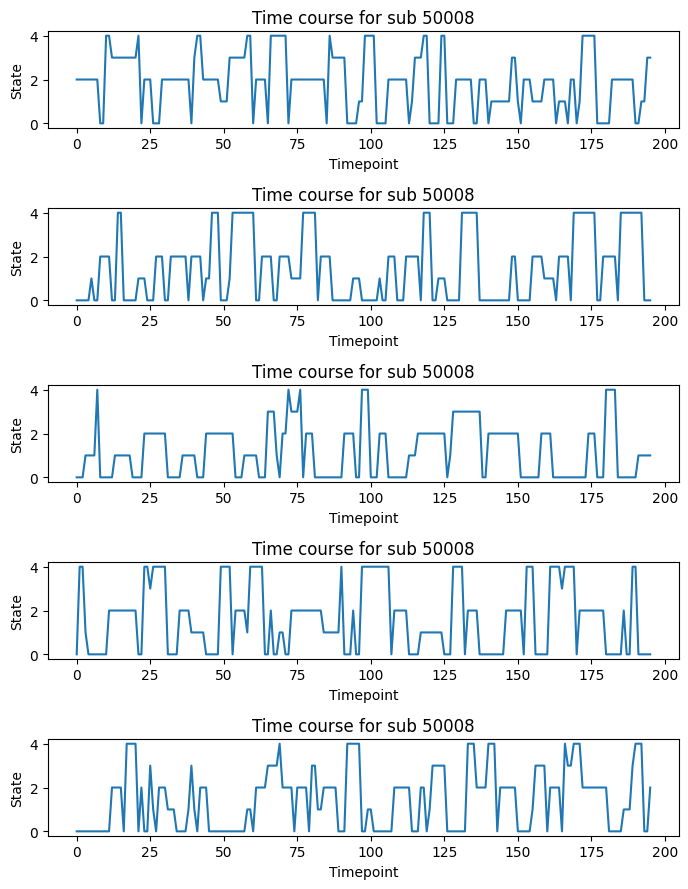

In [3]:
state_tc, states = connectivity.CoactivationPatterns(ts, n_states=5).estimate()

# Plot all estimated states
fig, ax = plt.subplots(1, 5, figsize=(8,2))
for i in range(states.shape[2]):
    ax[i].imshow(states[:,:,i])
    ax[i].set_title(f"State {i}")
    ax[i].axis("off")

fig, ax = plt.subplots(5, 1, figsize=(7,9))
for i in range(states.shape[2]):
    ax[i].plot(state_tc[i,:])
    ax[i].set(title=f"Time course for sub {subjects[0]}", xlabel="Timepoint", ylabel="State")

plt.tight_layout();